In [65]:
pip install stop_words

  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32911 sha256=2c05cb0eeaca7836acbfed903bf93fc89967aba6d1719a8221c40de19177f52d
  Stored in directory: c:\users\christian\appdata\local\pip\cache\wheels\da\d8\66\395317506a23a9d1d7de433ad6a7d9e6e16aab48cf028a0f60
Successfully built stop-words
Note: you may need to restart the kernel to use updated packages.


In [67]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.datasets import fetch_20newsgroups

import nltk

import nltk.stem

from nltk import word_tokenize

from stop_words import get_stop_words

from nltk.corpus import stopwords

In [15]:
data = np.array([[1,2], [2,3], [3,4], [4,5], [5,6]])
x = data[:,0]
y= data[:,1]

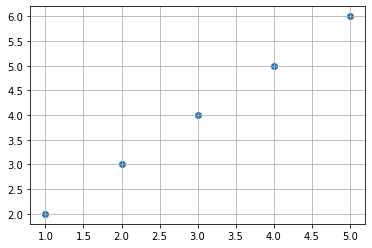

In [16]:
plt.scatter(x,y)
plt.grid(True)
plt.show()

In [17]:
vectorizer = CountVectorizer(min_df=1)

In [18]:
content = ["How to format my hard disk", " Hard diskformat problems"]

In [19]:
X = vectorizer.fit_transform(content)

In [20]:
vectorizer.get_feature_names()

['disk', 'diskformat', 'format', 'hard', 'how', 'my', 'problems', 'to']

In [21]:
X.toarray()

array([[1, 0, 1, 1, 1, 1, 0, 1],
       [0, 1, 0, 1, 0, 0, 1, 0]], dtype=int64)

In [22]:
X.toarray()[0]

array([1, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [23]:
 X.toarray () [1,2]

0

In [24]:
categories = ['alt.atheism', 'soc.religion.christian','comp.graphics', 'sci.med']

In [25]:
twenty_train = fetch_20newsgroups(subset='train',categories=categories, shuffle=True, random_state=42)

In [26]:
vectorizer = CountVectorizer()

In [27]:
train_counts =vectorizer.fit_transform(twenty_train.data)

In [28]:
vectorizer.vocabulary_.get('algorithm')

4690

In [29]:
len(vectorizer.get_feature_names())

35788

In [31]:
Vectorizer = CountVectorizer (stop_words = 'english')

In [32]:
sorted(vectorizer.get_stop_words())[:20]

TypeError: 'NoneType' object is not iterable

In [35]:
s = nltk.stem.SnowballStemmer('english')

In [36]:
s.stem("cats")

'cat'

In [37]:
s.stem("loving")

'love'

In [40]:
vectorizer = CountVectorizer(stop_words='english')
analyze = vectorizer.build_analyzer()
analyze("John bought carrots and potatoes")

['john', 'bought', 'carrots', 'potatoes']

In [42]:
english_stemmer = nltk.stem.SnowballStemmer('english')
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))

In [43]:
stem_vectorizer = StemmedCountVectorizer(min_df=1, stop_words='english')
stem_analyze = stem_vectorizer.build_analyzer()

In [55]:
Y = stem_analyze("John buying carrots and potatoes")

In [56]:
for tok in Y:
    print(tok)

john
buy
carrot
potato


In [46]:
categories = ['alt.atheism','soc.religion.christian','comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
train_counts = stem_vectorizer.fit_transform(twenty_train.data) 
len(stem_vectorizer.get_feature_names())

26888

In [49]:
#Mi stemer
spanish_stemer = nltk.stem.SnowballStemmer('spanish')
class MiStemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(MiStemmedCountVectorizer, self).build_analyzer()
        return lambda doc: (spanish_stemer.stem(w) for w in analyzer(doc))

In [68]:
#https://stackoverflow.com/questions/57359982/remove-stopwords-in-french-and-english-in-tfidfvectorizer
#Agrego la lista de stopwords con la libreria de nltk y se lo incluyo a mi objeto vectorizador   
final_stopwords_list = stopwords.words('spanish')

In [69]:
#mi Stemer
stem_vectorizer = MiStemmedCountVectorizer(min_df=1, stop_words=final_stopwords_list)
stem_analyze = stem_vectorizer.build_analyzer()

In [73]:
X = stem_analyze("Christian resuelve el trabajo practico")
Y = stem_analyze("Christian, rinde el final")

In [74]:
for tok in X:
    print(tok)

christi
resuelv
trabaj
practic


In [72]:
for tok in Y:
    print(tok)

christi
rind
final
